In [3]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [32]:
#Dataset 불러오기
df = pd.read_csv('car data.csv')

In [6]:
#Data 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [7]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.duplicated().sum()

2

In [33]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis=1,inplace = True)
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [34]:
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


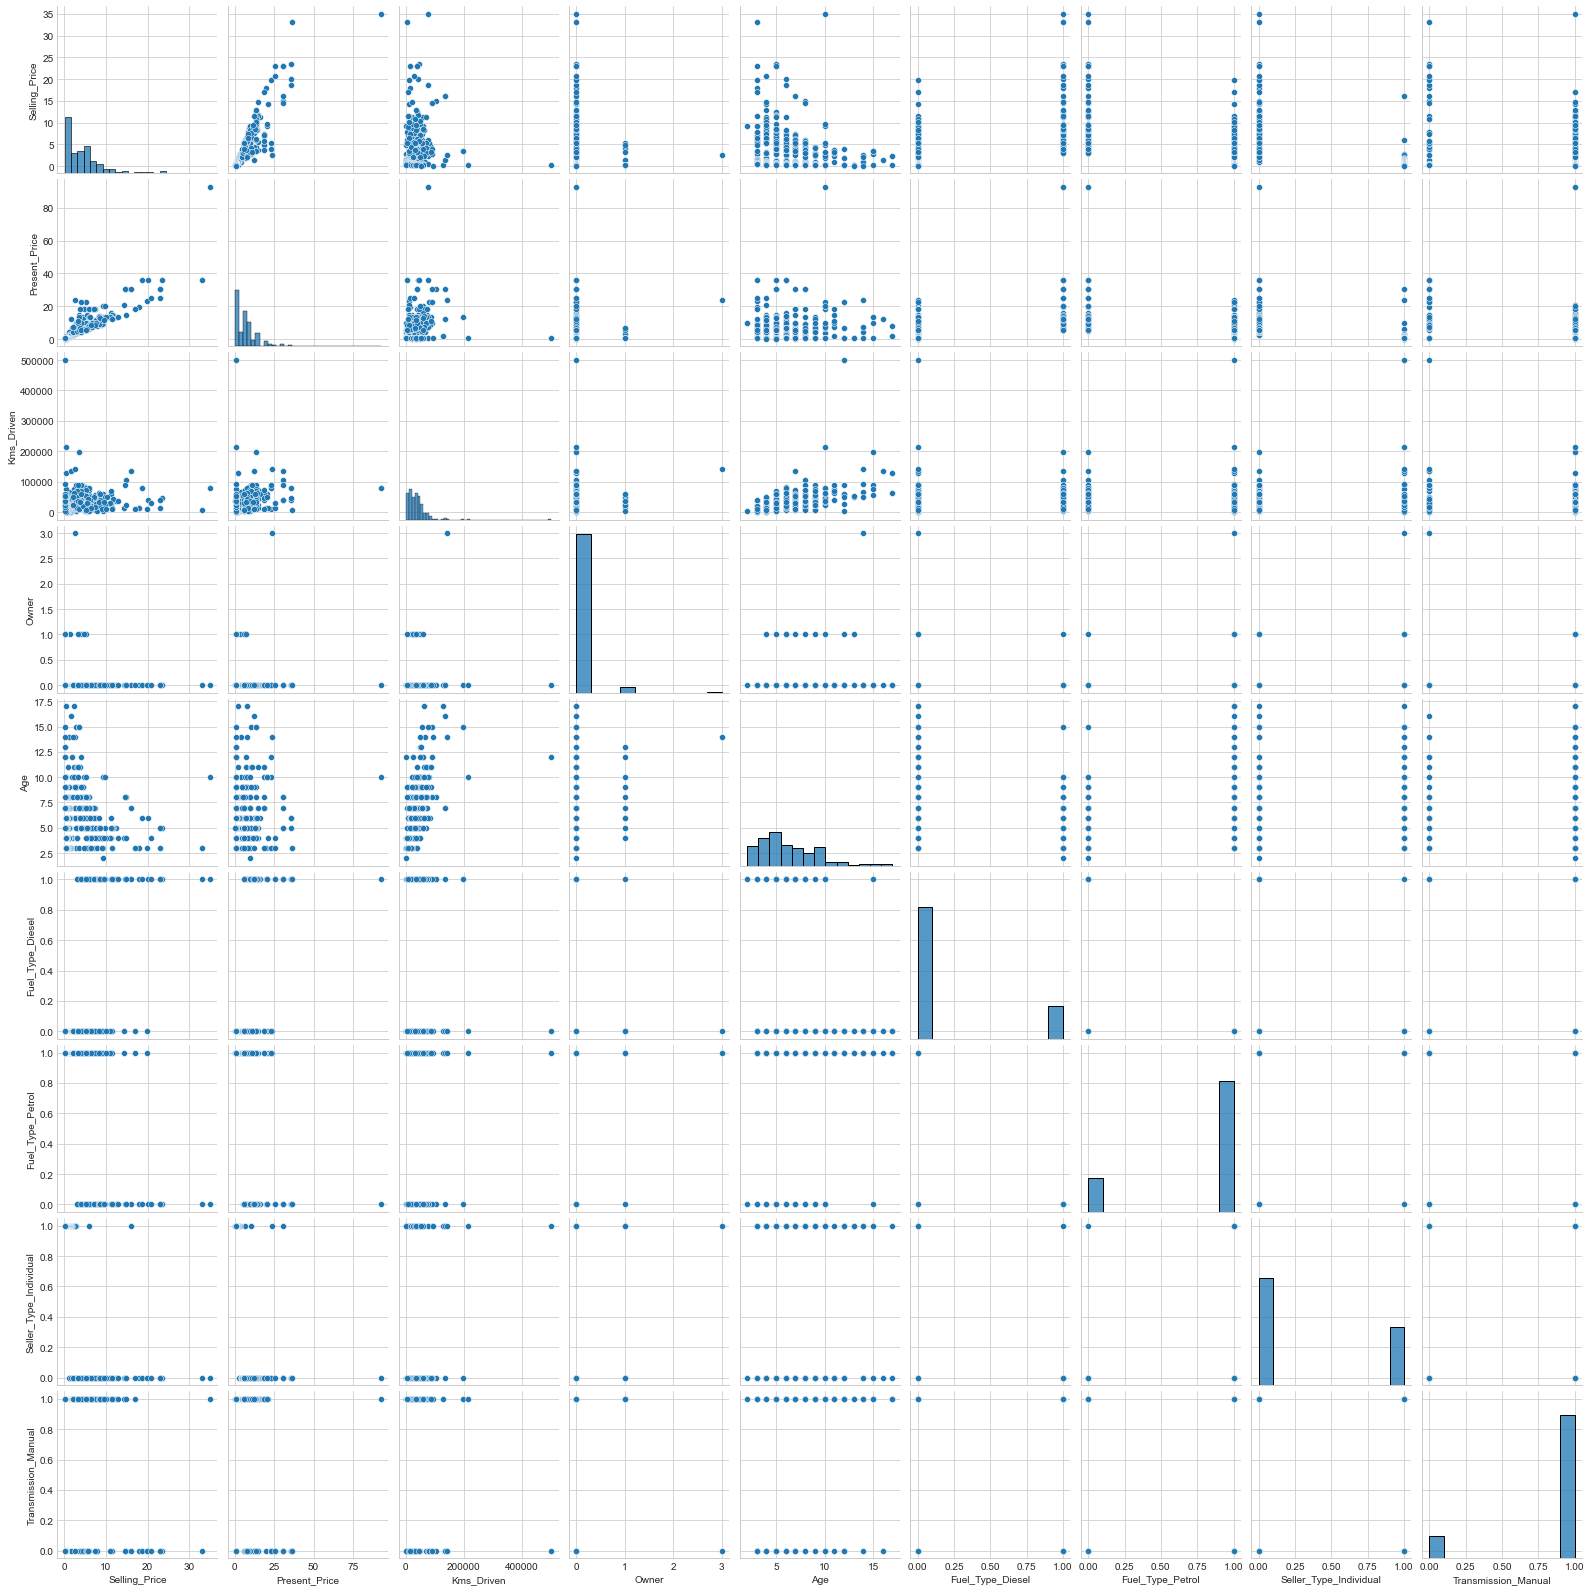

In [60]:
import seaborn as sb
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
plt.savefig('pairplor.png')

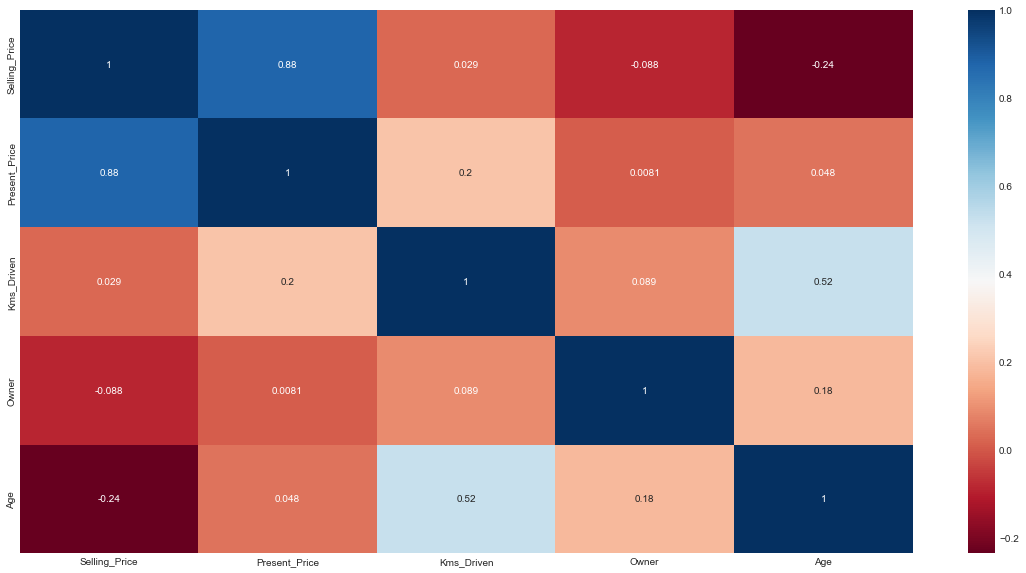

In [17]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [35]:
df.Fuel_Type.nunique()

3

In [36]:
df.Seller_Type.nunique()

2

In [37]:
df = pd.get_dummies(data=df, drop_first=True)

In [38]:
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
X_train.shape

(240, 8)

In [62]:
X_test.shape

(61, 8)

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

0.8625260513315252


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


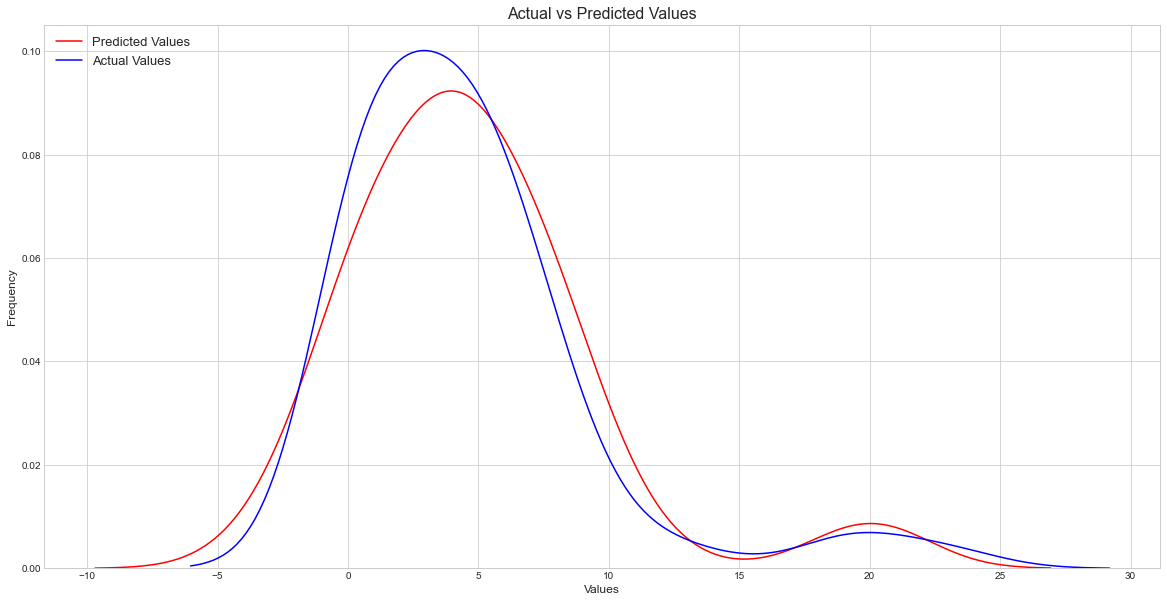

In [42]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.9411478102754202, 91


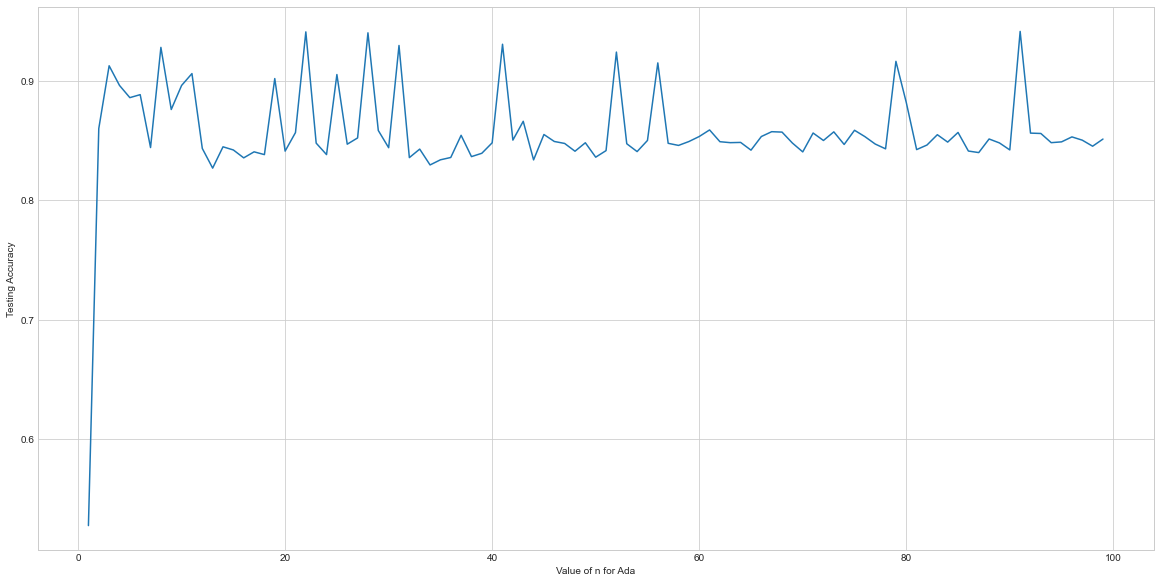

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    ada = AdaBoostRegressor(n_estimators = n)
    ada.fit(X_train, y_train)
    yhat = ada.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {max}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Ada')
plt.ylabel('Testing Accuracy')
plt.show()

In [49]:
ada = AdaBoostRegressor(n_estimators = 91)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [50]:
print(r2_score(y_test, yhat))

0.8510636422620972


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


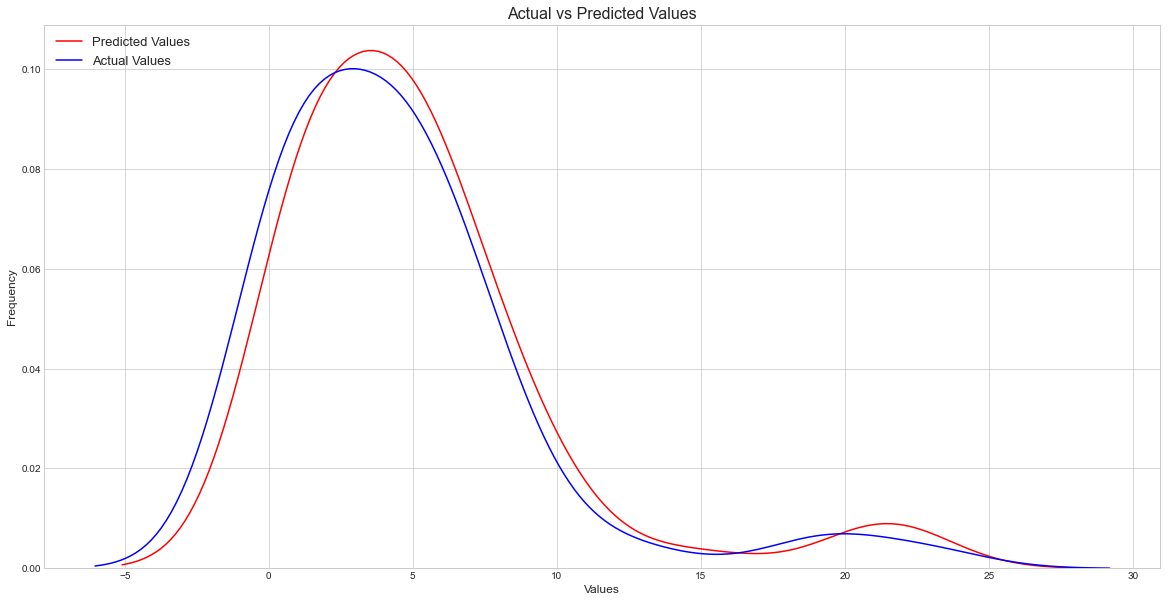

In [51]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.9488103712625474, 3


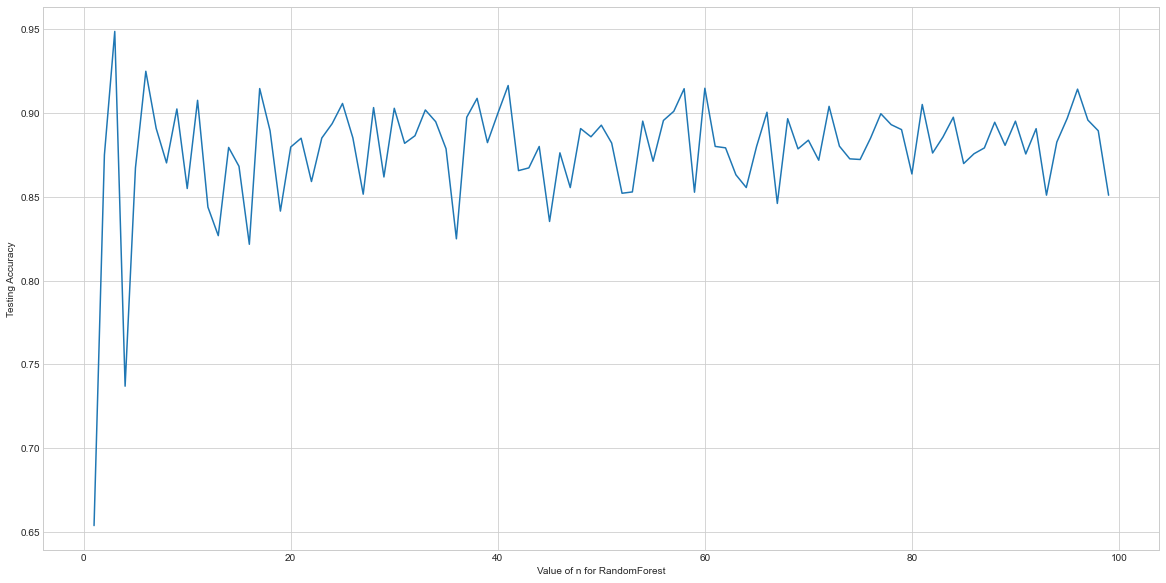

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    rf = RandomForestRegressor(n_estimators = n)
    rf.fit(X_train, y_train)
    yhat = rf.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {max}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for RandomForest')
plt.ylabel('Testing Accuracy')
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 8)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

In [69]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

0.9313255335759214


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


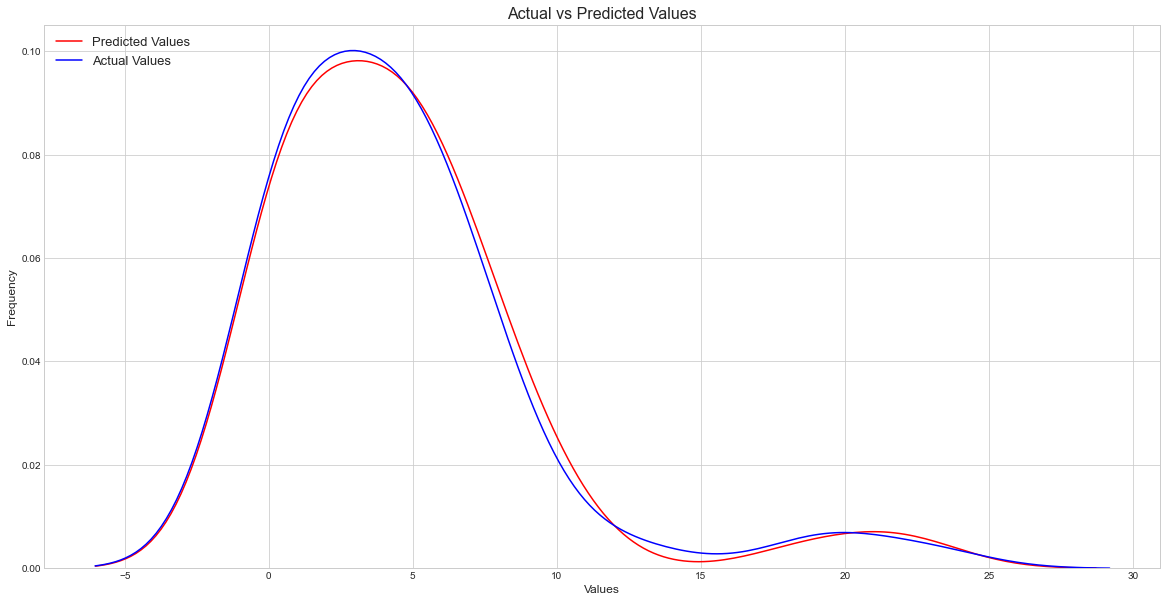

In [59]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')